# How well do jobs and skills pay for Data Analysts?

### Methology
- Evaluate median salary for top 6 data jobs
- Find median salary per skill for Data Analysts
- Visualize for highest paying skills and most demanded skills

## Import Libraries and Data

In [105]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distribution for United States

### Salary Distribution by Job Title

Filter our data to only include salary values from the **United States**.

In [106]:
# filter for the job title and country
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

Create a list of the main `job_titles` in our dataset and filter our dataframe to only contain these job titles.

In [107]:
job_titles = df_US['job_title_short'].value_counts().head(6).index.tolist()

# filter the df for the top 6 job titles
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [108]:
# order the job titles by median salary
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

### Plot Salary Distributions
Plot the top 6 job titles salary distributions using a box plot.

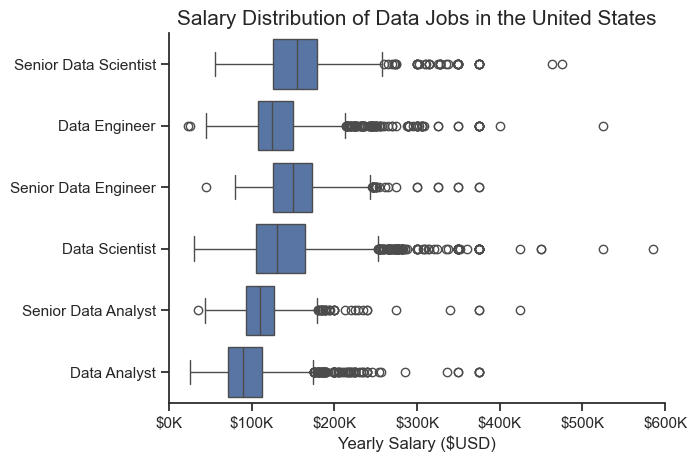

In [128]:
sns.set_theme(style='ticks')

sns.boxplot(data=df_US_top6,
            x = 'salary_year_avg',
            y = 'job_title_short',
            order = job_order)
sns.despine()
plt.xlim(0, 600000)
plt.title("Salary Distribution of Data Jobs in the United States", fontsize=15)
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()


## Investigate Median Salary Vs Skill for Data Analysts

Filters the original dataset to only get rows where the job title is `Data Analyst` and the country is 'United States', to create a new DataFrame `df_DA_US`. Drop `NaN` values from the `salary_year_avg` column.

Then it uses the `explode` method on the `job_skills` column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the salary_year_avg and job_skills columns.

In [110]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Explode the job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

df_DA_US_explode[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


### Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for `Data Analysts` by calculating the median salary for each skill listed in the `df_DA_US`. It groups the data by `job skills`, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame `df_DA_top_pay` with a reset index and a renamed salary column labeled `median_salary`.

In [111]:
df_DA_top_pay = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


Calculates the count and median salary for each skill in `df_DA_US`. It groups the data by `job_skills`, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [112]:
df_DA_skills = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


### Plot The Highest Paid Skills and Most Demanded Skills
Plot the The Highest Paid Skills and Most Demanded Skills using a horizontal bar charts.

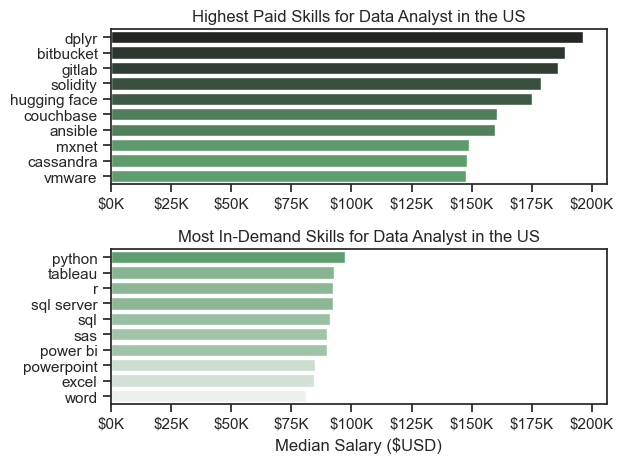

In [113]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

## Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay,
            x='median',
            y='job_skills',
            hue='median',
            palette='dark:g_r',
            ax=ax[0],
            legend=False)
ax[0].set_title("Highest Paid Skills for Data Analyst in the US")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills,
            x='median',
            y='job_skills',
            hue='median',
            palette='light:g',
            ax=ax[1],
            legend=False)
ax[1].set_title("Most In-Demand Skills for Data Analyst in the US")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ($USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()


## Salary Distribution for India

### Salary Distribution by Job Title

Filter our data to only include salary values from the **India**.

In [114]:
# filter for the job title and country
df_IND = df[df['job_country'] == 'India'].dropna(subset=['salary_year_avg'])

Create a list of the main `job_titles` in our dataset and filter our dataframe to only contain these job titles.

In [115]:
job_titles = df_IND['job_title_short'].value_counts().head(6).index.tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

But, we have to analysis the `Data Analyst`, `Data Engineer`, `Data Scientist`, and their senior roles to compare that with the United States data jobs.

So we create the job_list instead and then filter the `df_IND` dataframe with this `job_titles`.

In [116]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist', 'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist']



In [ ]:
# filter the df for the top 6 job titles
df_IND_job_titles = df_IND[df_IND['job_title_short'].isin(job_titles)]

In [135]:
# order the job titles by median salary
job_order = df_IND_job_titles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Scientist', 'Data Engineer', 'Senior Data Engineer',
       'Data Scientist', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

Here, we do a trick to sort the `Senior Data Engineer` position from *third* to *second* to match the US box plot. 

In [132]:
# Convert to list for easy manipulation
sorted_list = list(job_order)

# Remove 'Senior Data Engineer' and insert it at the second position
sorted_list.remove('Senior Data Engineer')
sorted_list.insert(1, 'Senior Data Engineer')

# Convert back to an index if needed
job_order = pd.Index(sorted_list)

job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Engineer',
       'Data Scientist', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object')

### Plot Salary Distributions
Plot the `job_titles` salary distributions using a box plot.

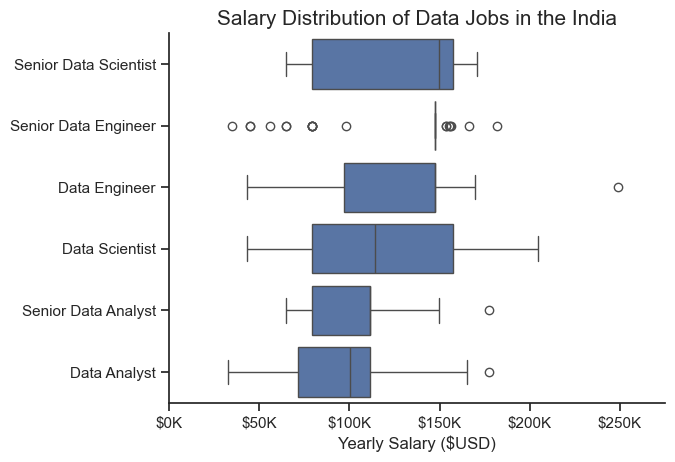

In [133]:
sns.set_theme(style='ticks')

sns.boxplot(data=df_IND_job_titles,
            x='salary_year_avg',
            y='job_title_short',
            order=job_order)
sns.despine()
plt.xlim(0, 275000)
plt.title("Salary Distribution of Data Jobs in India", fontsize=15)
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()